In [ ]:
%pip install tensorflow

In [ ]:
%pip install matplotlib

In [15]:
# grader-required-cell

import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

Now the images are stored within the `/tmp/PetImages` directory. There is a subdirectory for each class, so one for dogs and one for cats.

In [16]:
# grader-required-cell

source_path_wedding = 'train_dataset\wedding'
source_path_birthday = 'train_dataset\k_birth'
source_path_konser = 'train_dataset\konser'
source_path_cafe = 'train_dataset\cafe'
source_path_seminar = 'train_dataset\seminar'
# source_path_workshop = 'train_dataset\workshop'


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_wedding))} images of wedding.")
print(f"There are {len(os.listdir(source_path_birthday))} images of birthday.")
print(f"There are {len(os.listdir(source_path_konser))} images of konser.")
print(f"There are {len(os.listdir(source_path_cafe))} images of cafe.")
print(f"There are {len(os.listdir(source_path_seminar))} images of seminar.")
# print(f"There are {len(os.listdir(source_path_workshop))} images of workshop.")


There are 411 images of wedding.
There are 320 images of birthday.
There are 330 images of konser.
There are 176 images of cafe.
There are 248 images of seminar.


In [30]:
TRAINING_DIR = "train_dataset/"
training_datagen = ImageDataGenerator(rescale=1./255,  
                                    #   width_shift_range=0.2,
                                    #   height_shift_range=0.2,
                                    #   shear_range=0.2,
                                      validation_split=0.25)
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical',
    subset='training'
)
num_train_data = train_generator.samples
print("Jumlah dataset pelatihan:", num_train_data)
val_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=32,
    subset='validation'
)
num_val_data = val_generator.samples
print("Jumlah dataset validasi:", num_val_data)


Found 1115 images belonging to 5 classes.
Jumlah dataset pelatihan: 1115
Found 370 images belonging to 5 classes.
Jumlah dataset validasi: 370


In [ ]:
%pip install Pillow

In [4]:
from PIL import Image
from keras.preprocessing.image import load_img
import os
from keras.preprocessing.image import ImageDataGenerator


In [31]:
model=tf.keras.models.Sequential([
# YOUR CODE HERE, end with 3 Neuron Dense, activated by softmax

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])


In [32]:
class MyCustomCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            if logs['accuracy'] >0.83 and logs['val_accuracy'] >0.65:
                print("Validation accuracy and accuracy is up to 0.83. Stopping training.")
                self.model.stop_training = True

custom_callback = MyCustomCallback()




In [33]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.00009),
    metrics=['accuracy']
)

In [ ]:
%pip install scipy


In [7]:
import scipy

In [34]:
history = model.fit(
        train_generator,
        epochs=30,
        # verbose=1,
        validation_data=val_generator,
        callbacks=[custom_callback]
    )

Epoch 1/30
9/9 [==============================] - 34s 4s/step - loss: 1.5737 - accuracy: 0.2673 - val_loss: 1.5466 - val_accuracy: 0.2973
Epoch 2/30
9/9 [==============================] - 33s 4s/step - loss: 1.4676 - accuracy: 0.3623 - val_loss: 1.4513 - val_accuracy: 0.3486
Epoch 3/30
9/9 [==============================] - 31s 3s/step - loss: 1.3545 - accuracy: 0.4529 - val_loss: 1.4020 - val_accuracy: 0.3946
Epoch 4/30
9/9 [==============================] - 33s 4s/step - loss: 1.2813 - accuracy: 0.5067 - val_loss: 1.4142 - val_accuracy: 0.3757
Epoch 5/30
9/9 [==============================] - 30s 3s/step - loss: 1.2197 - accuracy: 0.5022 - val_loss: 1.3880 - val_accuracy: 0.4243
Epoch 6/30
9/9 [==============================] - 28s 3s/step - loss: 1.1599 - accuracy: 0.5462 - val_loss: 1.3615 - val_accuracy: 0.4514
Epoch 7/30
9/9 [==============================] - 42s 5s/step - loss: 1.0722 - accuracy: 0.6170 - val_loss: 1.3213 - val_accuracy: 0.4595
Epoch 8/30
9/9 [==================

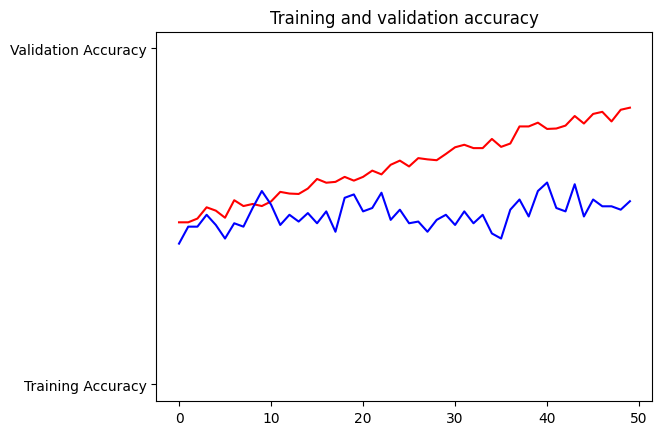

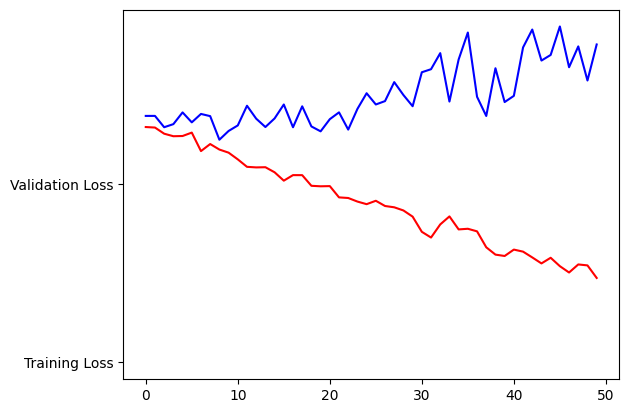

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [35]:
val_generator.class_indices

{'cafe': 0, 'k_birth': 1, 'konser': 2, 'seminar': 3, 'wedding': 4}

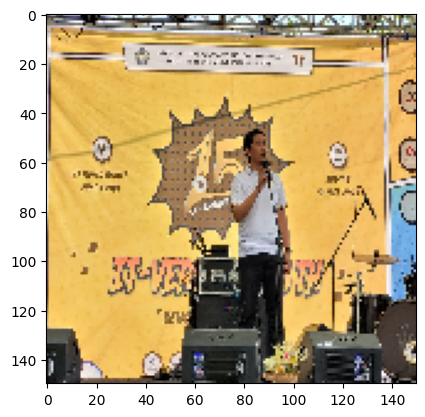

1/1 [==============================] - 0s 130ms/step
k_birth


In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
import numpy as np

# Load and preprocess the image
img_path = 'test_dataset\sambutan-koprodi.jpg'  # Replace with the path to your image file
img = image.load_img(img_path, target_size=(150, 150))
plt.imshow(img)
plt.show()

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
# img_array = preprocess_input(img_array)
img_array = np.vstack([img_array])
# Make predictions
predictions = model.predict(img_array)

# Decode and print the top-3 predicted classes
# decoded_predictions = decode_predictions(predictions, top=3)[0]
# print("Predictions:")
# for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
#     print(f"{i + 1}: {label} ({score:.2f})")

# # Optionally, you can use the top predicted class for further processing
# top_prediction = decoded_predictions[0]
# top_class = top_prediction[1]
# confidence = top_prediction[2]

# Now, you can use 'top_class' and 'confidence' for further processing or decision making.

if np.any(predictions) ==0 :
    print ("cafe")
elif np.any(predictions)== 1:
    print ("k_birth")
elif np.any(predictions)== 2:
    print ("konser")
elif np.any(predictions)== 3:
    print ("seminar")
elif np.any(predictions)== 4:
    print ("wedding")
else:
    print ("tidak terdeteksi")



# {'Ant': 0, 'Cat': 1, 'Dog': 2}